# **Problem Statement**
<br>You are the data scientist at a telecom company named “Neo” whose customers
are churning out to its competitors. You have to analyze the data of your
company and find insights and stop your customers from churning out to other
telecom companies.

In [166]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [167]:
df = pd.read_csv("/content/customer_churn.csv",na_values=[' '])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Meta Data**

In [168]:
df.shape

(7043, 21)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [170]:
df.isnull().sum().sum()

11

In [171]:
df.drop(columns='customerID',inplace=True)
df.dropna(inplace=True)
df.TotalCharges = df.TotalCharges.astype('float')

In [172]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [173]:
cat_cols = df.select_dtypes(include='object')
num_cols = df.select_dtypes(include=['int' ,'float'])

for i in cat_cols:
  print(f"Column Name: {i}\n{df[i].value_counts()}\n\n")

Column Name: gender
Male      3549
Female    3483
Name: gender, dtype: int64


Column Name: Partner
No     3639
Yes    3393
Name: Partner, dtype: int64


Column Name: Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64


Column Name: PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64


Column Name: MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


Column Name: InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


Column Name: OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


Column Name: OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


Column Name: DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: D

**Data Maniplulation**


How to many old people pay through internet ?

In [174]:
df[(df.gender == "Male") & (df.SeniorCitizen == 1) & (df.PaymentMethod == 'Electronic check')].shape[0]

298

How many High value customer are there ?

In [175]:
df[((df.tenure > 70) | (df.MonthlyCharges > 100)) & (df.Churn == 'No')].shape[0]

1002

**Data Visualization**

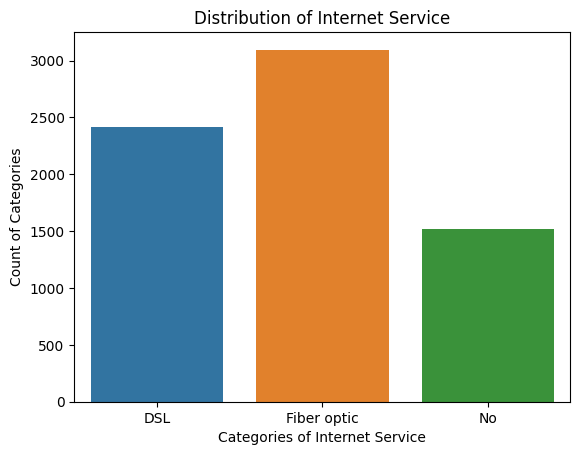

In [176]:
sns.countplot(x=df.InternetService)
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

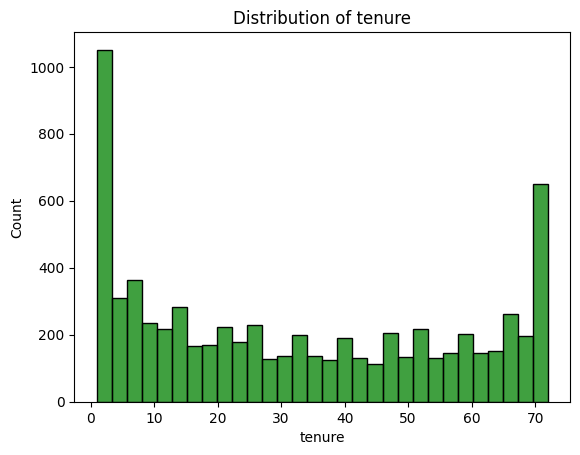

In [177]:
sns.histplot(df.tenure,bins=30, color='green')
plt.title('Distribution of tenure')
plt.show()

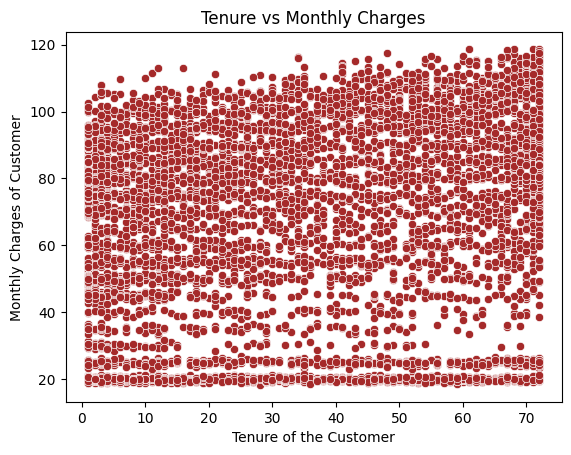

In [178]:
sns.scatterplot(x=df.tenure, y=df.MonthlyCharges, color='brown')
plt.xlabel('Tenure of the Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

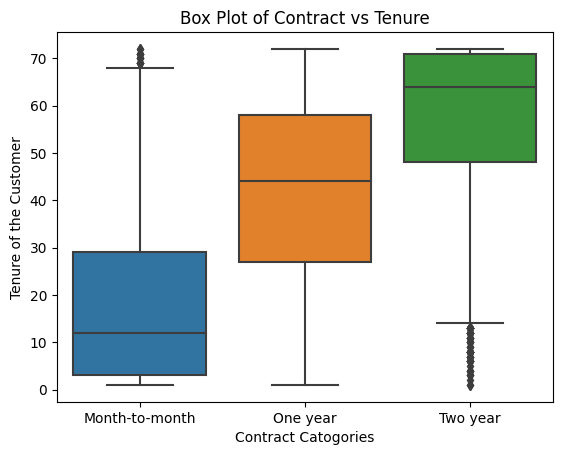

In [179]:
sns.boxplot(y=df.tenure, x=df.Contract)
plt.xlabel('Contract Catogories')
plt.ylabel('Tenure of the Customer')
plt.title("Box Plot of Contract vs Tenure")
plt.show()

**Data Cleaning**

In [180]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object')
lr = LabelEncoder()

for i in cat_cols:
  df[i] = lr.fit_transform(df[i])


**Feature Selection**

In [181]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns='Churn')
y = df.Churn

rfc = RandomForestClassifier()

rfe = RFE(rfc)
rfe.fit(X,y)

selected = X.columns[rfe.support_]
selected

Index(['tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

**Model Selection**

In [182]:
from sklearn.model_selection import train_test_split

X = df[selected]
y = df.Churn

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**ML Models**

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

lr = LogisticRegression()
cross = cross_validate(lr, x_train, y_train, cv=5, scoring='f1')

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n\n")
print(classification_report(y_test,y_pred))

Accuracy: 0.7890995260663507


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.63      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report

dtc = DecisionTreeClassifier()
cross = cross_validate(dtc, x_train, y_train, cv=5, scoring='f1')

dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n\n")
print(classification_report(y_test,y_pred))

Accuracy: 0.7146919431279621


              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1549
           1       0.47      0.51      0.49       561

    accuracy                           0.71      2110
   macro avg       0.64      0.65      0.65      2110
weighted avg       0.72      0.71      0.72      2110



In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report

rfc = RandomForestClassifier()
cross = cross_validate(rfc, x_train, y_train, cv=5, scoring='f1')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n\n")
print(classification_report(y_test,y_pred))

Accuracy: 0.7649289099526067


              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1549
           1       0.57      0.50      0.53       561

    accuracy                           0.76      2110
   macro avg       0.70      0.68      0.69      2110
weighted avg       0.76      0.76      0.76      2110



**Model Optimization**

In [186]:
from hyperopt import hp, tpe, fmin, Trials, space_eval, SparkTrials
from hyperopt.pyll import scope
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def ob(para):
  model = RandomForestClassifier(**para,n_jobs=-1)
  score = cross_val_score(model, X, y, cv=5, scoring='f1').mean()
  return -score


space = {
    'n_estimators':scope.int(hp.quniform('n_estimators',50,500,1)),
    'criterion':hp.choice('criterion',['gini','entropy','log_loss']),
    'max_depth':scope.int(hp.quniform('max_depth',3,15,1)),
    'min_samples_split':scope.int(hp.quniform('min_samples_split',2,100,1)),
    'min_samples_leaf':scope.int(hp.quniform('min_samples_leaf',2,25,1)),
    'class_weight': hp.choice('class_weight',['balanced', 'balanced_subsample',None])
}

trials = Trials()

best = fmin(fn=ob ,space=space ,algo=tpe.suggest ,max_evals=100 ,trials=trials)

best_para = space_eval(space, best)

100%|██████████| 100/100 [22:36<00:00, 13.57s/trial, best loss: -0.6369873103204866]


In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_validate

rfc = RandomForestClassifier(**best_para)
cross = cross_validate(rfc, x_train, y_train, cv=5, scoring='f1')

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)} \n\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7445497630331753 


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1549
           1       0.51      0.78      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.75      0.71      2110
weighted avg       0.80      0.74      0.76      2110



In [188]:
best_para

{'class_weight': 'balanced_subsample',
 'criterion': 'log_loss',
 'max_depth': 11,
 'min_samples_leaf': 14,
 'min_samples_split': 95,
 'n_estimators': 361}